In [6]:
import constants
import numpy as np
import matplotlib.pyplot as plt

from helpers import rk4
from helpers import ODEs_nineboxes
from emissions import emissions
from emissions import modified_emissions

### **Calling/Plotting RK4 & Euler Integrations** ###

In [7]:
# initial_masses = constants.Mi0
constants.MODIFIED_EMISSIONS = False
constants.FORCING = True
constants.FIRE = False

xinitial = 1800
xfinal =   2200

n=3000

STEP SIZE: 0.13333333333333333
RK4 Time Elapsed: 1.772 seconds


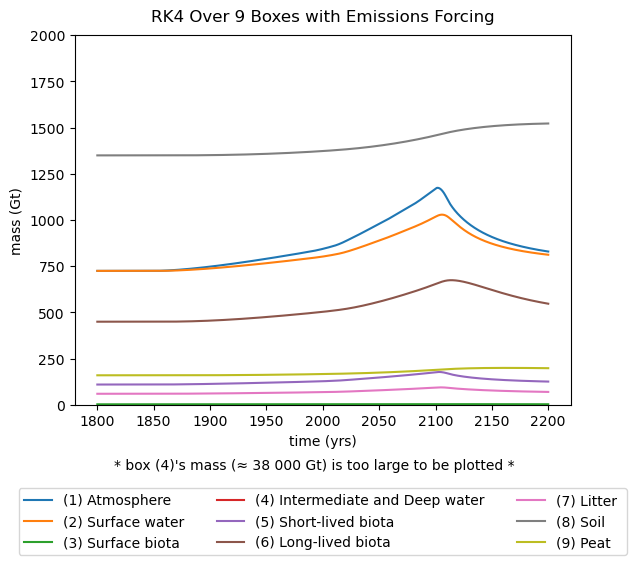

In [9]:
rungekutta_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_nineboxes, N=n)

# plot, label, rk4 integration over our time period
plt.plot(rungekutta_nine[0],rungekutta_nine[1])
plt.xlabel('time (yrs)'), plt.ylabel('mass (Gt)')
plt.title(f'RK4 Over 9 Boxes with Emissions Forcing',pad=10)
plt.legend(constants.ninebox_legend_arr, bbox_to_anchor=[0.5,-0.425], loc='lower center', ncol=3)
plt.figtext(x=0.5,y=-0.025, s='* box (4)\'s mass (\u2248 38 000 Gt) is too large to be plotted *',ha='center')

plt.ylim(0,2000)

plt.show()

# **1. Evolution of Boxes 1 & 2 Responding to 2012 IPCC's A2 Scenario**

/Users/ejb/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ejb/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


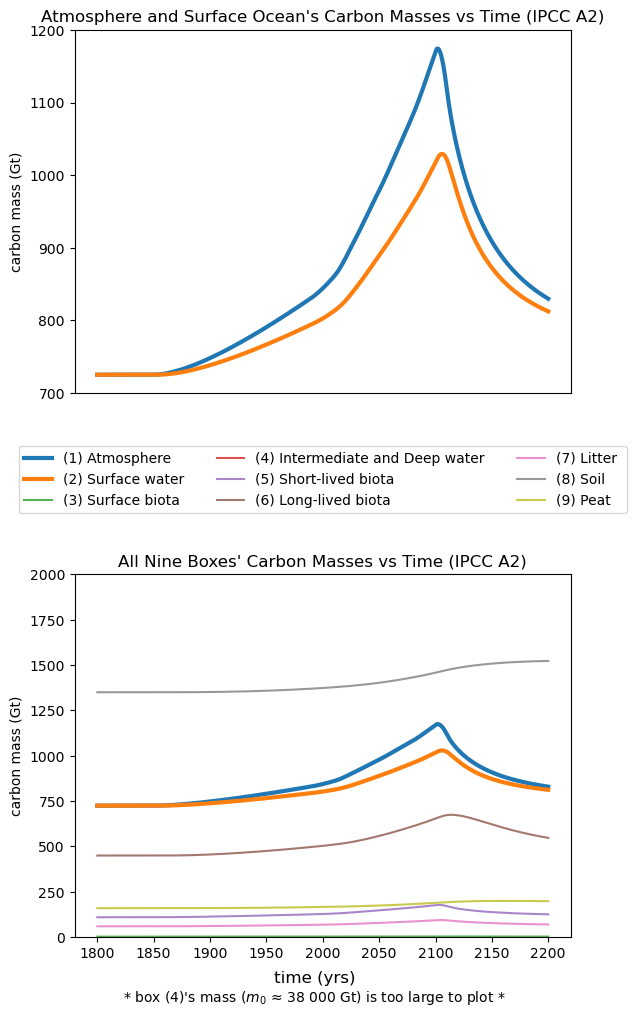

In [101]:
masses_nine = rungekutta_nine[1]
time_nine = rungekutta_nine[0]

atm_arr_nine = []
surfaceocean_arr_nine = []

for i in range(len(masses_nine)):
    atm_arr_nine.append(masses_nine[i][0])
    surfaceocean_arr_nine.append(masses_nine[i][1])    

fig, axes = plt.subplots(nrows=2,ncols=1)
    
axes[0].plot(time_nine, atm_arr_nine,color='#1f77b4',linewidth=3), axes[0].plot(time_nine, surfaceocean_arr_nine,color='#ff7f0e',linewidth=3)
axes[0].set_title('Atmosphere and Surface Ocean\'s Carbon Masses vs Time (IPCC A2)')
axes[0].xaxis.set_visible(False)
axes[0].set_ylim([700,1200])

# axes[1].axvline(x=2100, linestyle='dashed',color='red')

bigplot = axes[1].plot(rungekutta_nine[0],rungekutta_nine[1])
axes[1].set_title('All Nine Boxes\' Carbon Masses vs Time (IPCC A2)')
axes[1].set_ylim([0,2000])

for i in range(2,9):
    bigplot[i].set_alpha(0.8)
    # bigplot[i].set_linestyle('dashed')

for i in range(0,2):
    bigplot[i].set_linewidth(3)

axes[1].legend(constants.ninebox_legend_arr, bbox_to_anchor=[0.5,1.15], loc='lower center', ncol=3)

plt.figtext(x=0.5,y=-0.025, s='* box (4)\'s mass ($m_0$ \u2248 38 000 Gt) is too large to plot *',ha='center')
fig.supxlabel('time (yrs)')
fig.subplots_adjust(hspace=0.5,top=2)

axes[0].set_ylabel('carbon mass (Gt)')
axes[1].set_ylabel('carbon mass (Gt)')

fig.savefig('q1.png', bbox_inches='tight')

In [6]:
# fig, axes = plt.subplots(3, 1)

# ylim = [700,1500]
# xlim = [1800,2200]

# axes[0].plot(time_nine,atm_arr_nine), axes[0].plot(time_nine,surfaceocean_arr_nine), axes[0].set_ylim(ylim), axes[0].xaxis.set_visible(False)
# axes[1].plot(time_nine, atm_arr_nine, 'orange'), axes[1].set_ylim(ylim), axes[1].xaxis.set_visible(False)
# axes[2].plot(time_nine, surfaceocean_arr_nine),  axes[2].set_ylim(ylim)

# axes[0].legend(['Atmosphere', 'Surface Ocean'])
# axes[0].title.set_text('(RK4 Integration over Nine Boxes)')

# fig.supxlabel('time (yr)')
# fig.supylabel('carbon mass (Gt)')
# fig.suptitle('Atmosphere and Surface Ocean Carbon Mass Evolution')

# plt.show()

# **2. MODIFIED EMISSIONS**

In [7]:
constants.FORCING = False
constants.FIRE = False
constants.MODIFIED_EMISSIONS = True

rungekutta_modified_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=2200, y0=constants.Mi0_nineboxes, N=5000)

masses_modified_nine = rungekutta_modified_nine[1]
time_modified_nine = rungekutta_modified_nine[0]

atm_arr_modified_nine = []
surfaceocean_arr_modified_nine = []

for i in range(len(masses_modified_nine)):
    atm_arr_modified_nine.append(masses_modified_nine[i][0])
    surfaceocean_arr_modified_nine.append(masses_modified_nine[i][1])  

STEP SIZE: 0.08
RK4 Time Elapsed: 2.606 seconds


/Users/ejb/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ejb/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


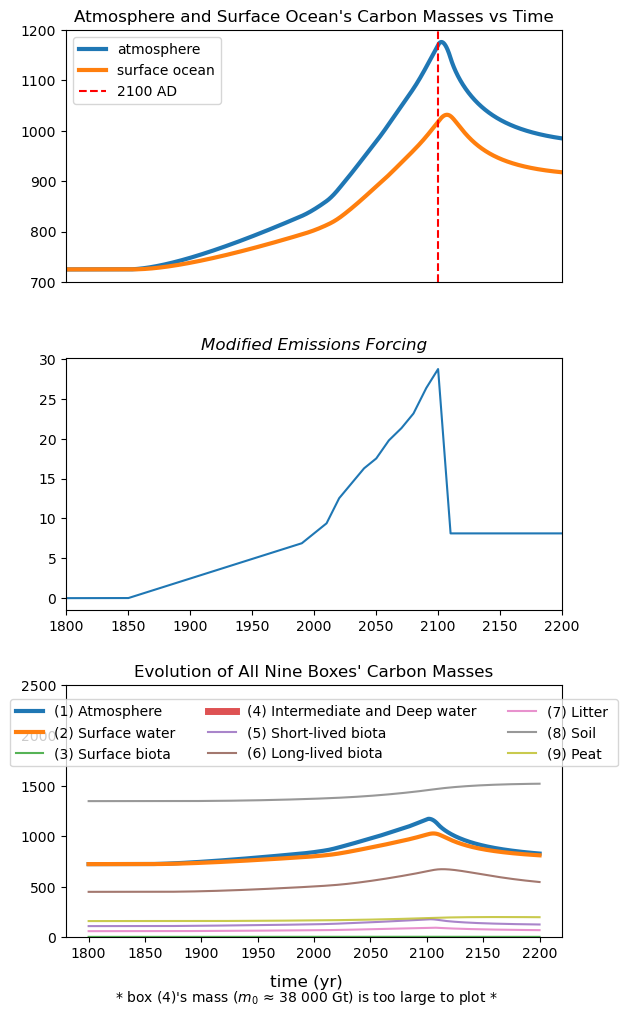

In [46]:
fig_modified, axes_modified = plt.subplots(3,1)

axes_modified[0].plot(time_modified_nine, atm_arr_modified_nine, linewidth=3)
axes_modified[0].plot(time_modified_nine, surfaceocean_arr_modified_nine, linewidth=3)
axes_modified[0].axvline(x=2100,color='r',linestyle='--')

# axes_modified[1].plot(time_modified_nine, atm_arr_modified_nine)
emission_time = np.linspace(xinitial, xfinal, 5000)
axes_modified[1].plot(emission_time, modified_emissions(emission_time)), 

# axes_modified[2].plot(time_modified_nine, surfaceocean_arr_modified_nine, 'orange')

modified_ylim=[700,1200]
modified_xlim=[1800,2200]

axes_modified[0].set_ylim(modified_ylim), axes_modified[0].set_xlim(modified_xlim), axes_modified[0].xaxis.set_visible(False)
axes_modified[1].set_xlim(modified_xlim)
# axes_modified[2].set_ylim(modified_ylim), axes_modified[2].set_xlim(modified_xlim)

axes_modified[0].legend(['atmosphere','surface ocean','$t = 2100 AD$'],loc='upper left')

fig_modified.supxlabel(t='time (yr)',y=0)

# fig_modified.suptitle('Evolution of the Atmosphere and Surface Ocean Carbon Masses with Emissions')
axes_modified[1].set_title('Modified Emissions Forcing',style='italic')
axes_modified[0].set_title('Atmosphere and Surface Ocean\'s Carbon Masses vs Time')

# axes_modified[0].axhline(1400), axes_modified[0].axhline(1200)
# axes_modified[0].axvline(2200)

bigplot = axes_modified[2].plot(rungekutta_nine[0],rungekutta_nine[1])
axes_modified[2].set_title('Evolution of All Nine Boxes\' Carbon Masses')
axes_modified[2].set_ylim([0,2500])

for i in range(2,9):
    bigplot[i].set_alpha(0.8)
    # bigplot[i].set_linestyle('dashed')

for i in range(0,2):
    bigplot[i].set_linewidth(3)

bigplot[3].set_linewidth(5)
bigplot[3].set_ydata(bigplot[3].get_ydata() - 30000)

axes_modified[2].legend(constants.ninebox_legend_arr, bbox_to_anchor=[0.5,0.65], loc='lower center', ncol=3)

plt.subplots_adjust(hspace = 0.3,top=2)
plt.figtext(x=0.5,y=-0.025, s='* box (4)\'s mass ($m_0$ \u2248 38 000 Gt) is too large to plot *',ha='center')

triplefig = fig_modified

In [20]:
## what is difference between sum of masses after forcing vs before?

sum_masses_before = np.sum(rungekutta_modified_nine[1][0])
sum_masses_after = np.sum(rungekutta_modified_nine[1][5000])

difference_of_sums = sum_masses_after - sum_masses_before
difference_of_sums

(3260.000000000029+0j)

In [121]:
emission_time = np.linspace(xinitial, xfinal, 5000)

cumulative_emissions = np.zeros(5000)
tot = 0
step_size = (xfinal-xinitial)/5000
for i in range(1,5000):
    tot = tot + modified_emissions(emission_time[i-1])*step_size
    cumulative_emissions[i] = tot

cumulative_emissions_IPCCA2 = np.zeros(5000)
tot_IPCCA2 = 0
for i in range(1,5000):
    tot_IPCCA2 = tot_IPCCA2 + emissions(emission_time[i-1])*step_size
    cumulative_emissions_IPCCA2[i] = tot_IPCCA2

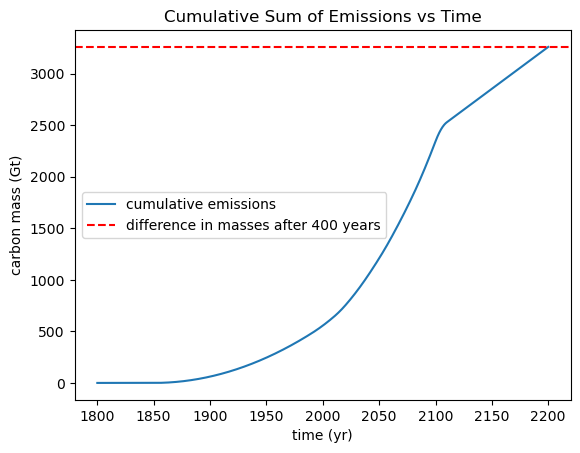

In [22]:
plt.plot(emission_time, cumulative_emissions)
plt.axhline(y=difference_of_sums,linestyle='dashed',color='red')
plt.legend(['cumulative emissions','difference in masses after 400 years'])
plt.title('Cumulative Sum of Emissions vs Time')
plt.ylabel('carbon mass (Gt)')
plt.xlabel('time (yr)')

plt.show()

Text(0.5, 1.0, 'Cumulative Emissions Forcing')

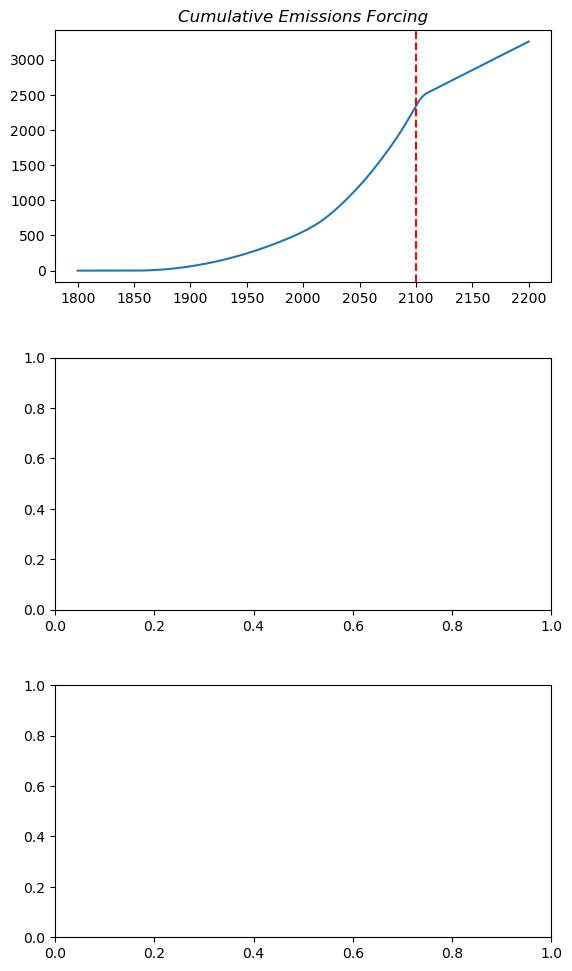

In [65]:
figppt, axesppt = plt.subplots(3,1)

axesppt[0].plot(emission_time, cumulative_emissions)
axesppt[0].axvline(2100,linestyle='dashed',color='red')
plt.subplots_adjust(hspace = 0.3,top=2)

axesppt[0].set_title('Cumulative Emissions Forcing',style='italic')

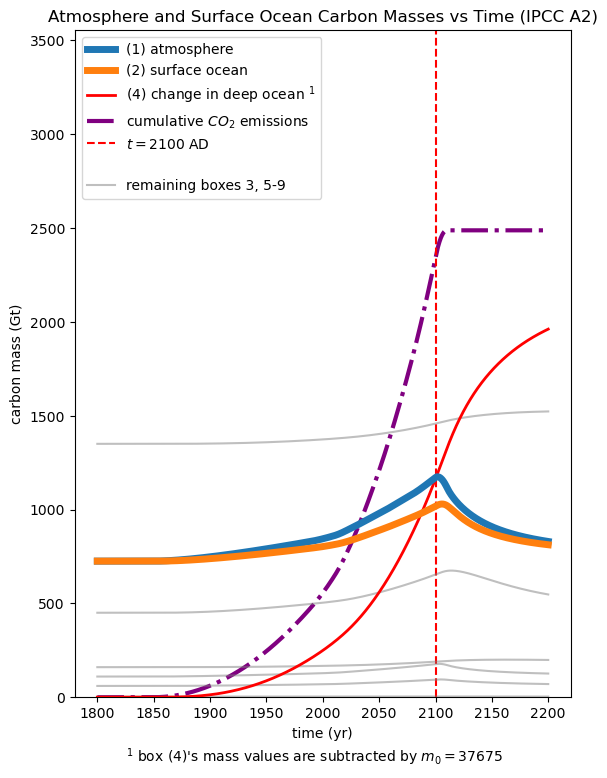

In [132]:
## overlapping above figures for Q1...

## overlapping above two figures...

fig_modified, axes_modified = plt.subplots(1,1)

axes_modified.plot(time_nine, atm_arr_nine, linewidth=5,color='#1f77b4',zorder=12)
axes_modified.plot(time_nine, surfaceocean_arr_nine, linewidth=5,color='#ff7f0e',zorder=15)

deepocean_arr_nine = []

for i in range(len(masses_nine)):
    deepocean_arr_nine.append(masses_nine[i][3] - 37675) 

axes_modified.plot(time_nine, deepocean_arr_nine, linewidth=2, color='red',zorder=10)
axes_modified.plot(emission_time, cumulative_emissions_IPCCA2, linestyle='-.', color='purple', linewidth=3)

axes_modified.axvline(x=2100,color='r',linestyle='--')

totalplot = axes_modified.plot(rungekutta_nine[0],rungekutta_nine[1],alpha=0.8)

for i in range(0,9):
    totalplot[i].set_color('grey')
    totalplot[i].set_alpha(0.5)
totalplot[0].set_alpha(0)

plt.legend(['(1) atmosphere','(2) surface ocean', '(4) change in deep ocean $^1$', 'cumulative $CO_2$ emissions','$t = 2100$ AD','','remaining boxes 3, 5-9'])
plt.subplots_adjust(top=1.5)

axes_modified.set_ylim([0,3555])
axes_modified.set_ylabel('carbon mass (Gt)')
axes_modified.set_xlabel('time (yr)')
plt.title('Atmosphere and Surface Ocean Carbon Masses vs Time (IPCC A2)')

plt.figtext(x=0.5,y=-0.025, s='$^1$ box (4)\'s mass values are subtracted by $m_0 = 37675$',ha='center')

fig_modified.savefig('q1.png', bbox_inches='tight')

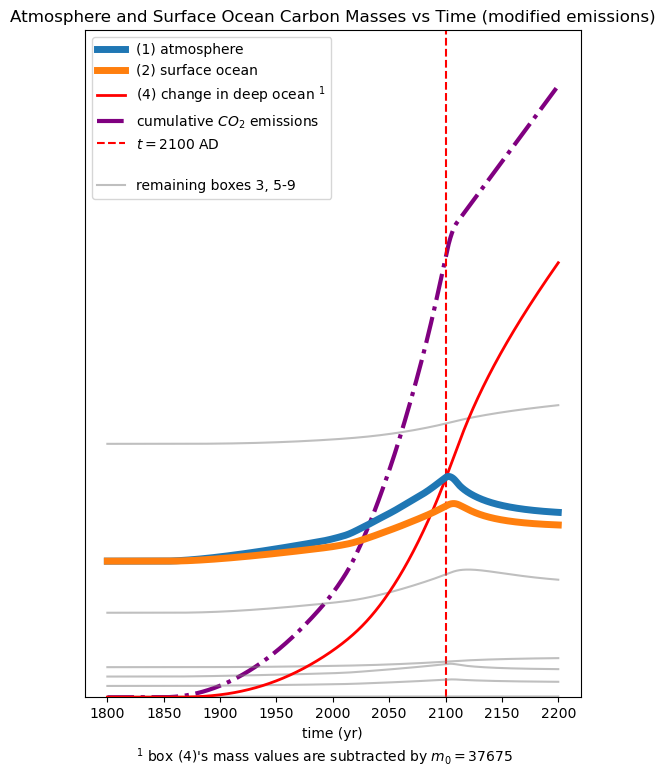

In [135]:
## overlapping above two figures...

fig_modified, axes_modified = plt.subplots(1,1)

axes_modified.plot(time_modified_nine, atm_arr_modified_nine, linewidth=5,color='#1f77b4',zorder=12)
axes_modified.plot(time_modified_nine, surfaceocean_arr_modified_nine, linewidth=5,color='#ff7f0e',zorder=15)

deepocean_arr_modified_nine = []

for i in range(len(masses_modified_nine)):
    deepocean_arr_modified_nine.append(masses_modified_nine[i][3] - 37675) 

axes_modified.plot(time_modified_nine, deepocean_arr_modified_nine, linewidth=2, color='red',zorder=10)
axes_modified.plot(emission_time, cumulative_emissions, linestyle='-.', color='purple', linewidth=3)

axes_modified.axvline(x=2100,color='r',linestyle='--')

totalplot = axes_modified.plot(rungekutta_modified_nine[0],rungekutta_modified_nine[1],alpha=0.8)

for i in range(0,9):
    totalplot[i].set_color('grey')
    totalplot[i].set_alpha(0.5)
totalplot[0].set_alpha(0)

plt.legend(['(1) atmosphere','(2) surface ocean', '(4) change in deep ocean $^1$', 'cumulative $CO_2$ emissions','$t = 2100$ AD','','remaining boxes 3, 5-9'])
plt.subplots_adjust(top=1.5)

axes_modified.set_ylim([0,3555])
# axes_modified.set_ylabel('carbon mass (Gt)')
axes_modified.yaxis.set_visible(False)
axes_modified.set_xlabel('time (yr)')
plt.title('Atmosphere and Surface Ocean Carbon Masses vs Time (modified emissions)')

plt.figtext(x=0.5,y=-0.025, s='$^1$ box (4)\'s mass values are subtracted by $m_0 = 37675$',ha='center')

fig_modified.savefig('q2.png', bbox_inches='tight')

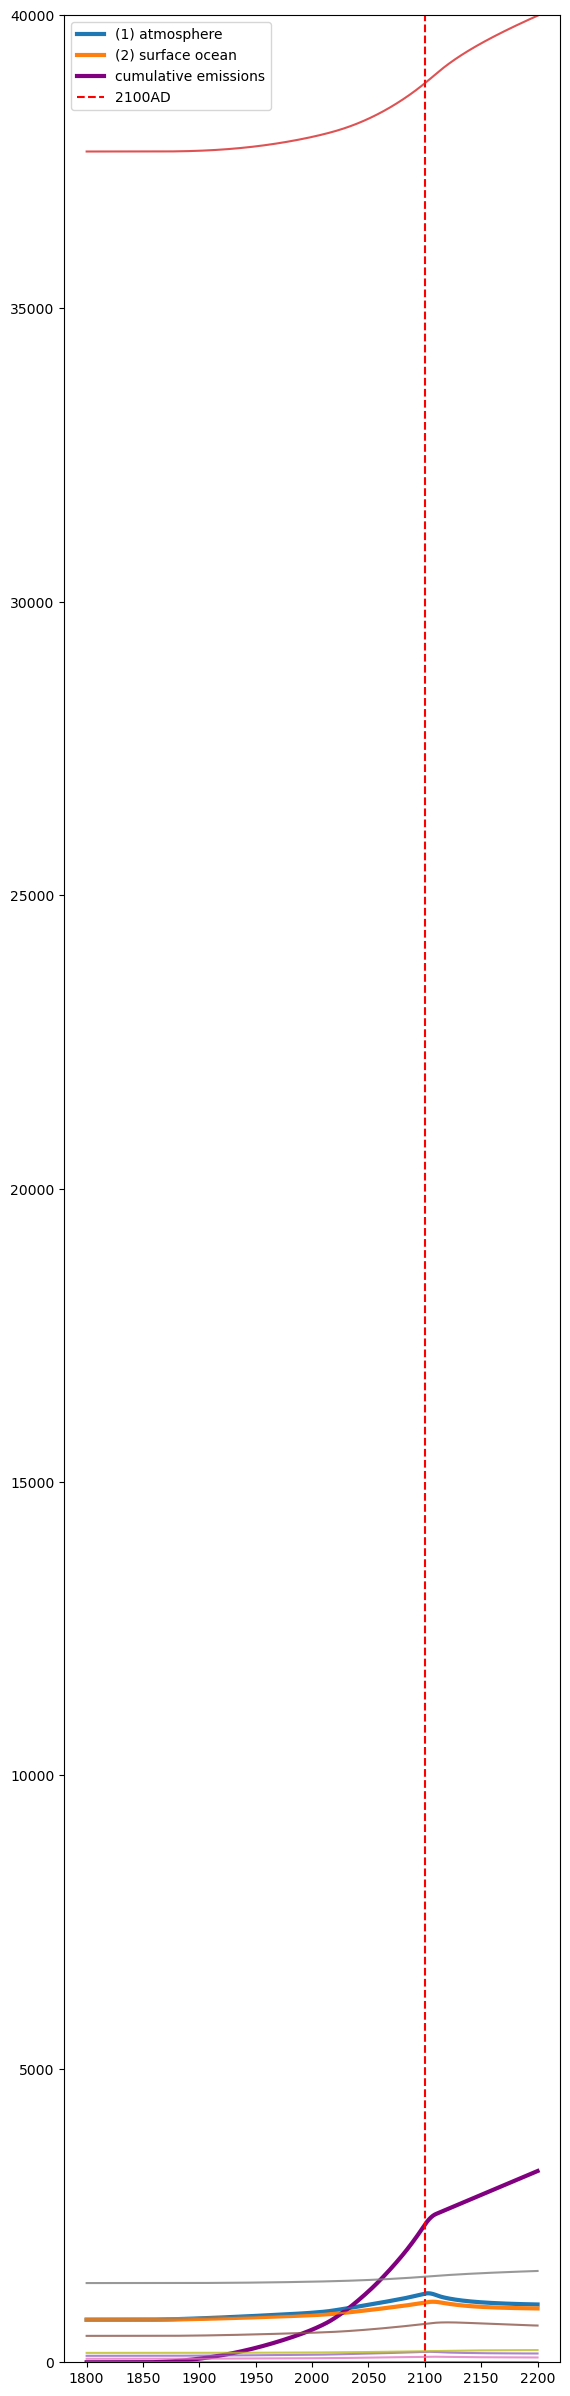

In [25]:
finalhehe.subplots_adjust(top=5)
axes_modified.set_ylim([0,40000])
# bigplot[3].set_ydata(bigplot[3].get_ydata() - 30000)
finalhehe

# **4. EXPERIMENTING (4% FOREST LOSS PER YEAR)**

In [12]:
constants.MODIFIED_EMISSIONS = False
constants.FORCING = True
constants.FIRE = True

rungekutta_experimenting_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=2200, y0=constants.Mi0_nineboxes, N=5000)

masses_experimenting_nine = rungekutta_experimenting_nine[1]
time_experimenting_nine = rungekutta_experimenting_nine[0]

atm_arr_experimenting_nine = []
longbiota_arr_experimenting_nine = []

for i in range(len(masses_experimenting_nine)):
    atm_arr_experimenting_nine.append(masses_experimenting_nine[i][0])
    longbiota_arr_experimenting_nine.append(masses_experimenting_nine[i][5]) 

STEP SIZE: 0.08
RK4 Time Elapsed: 2.691 seconds


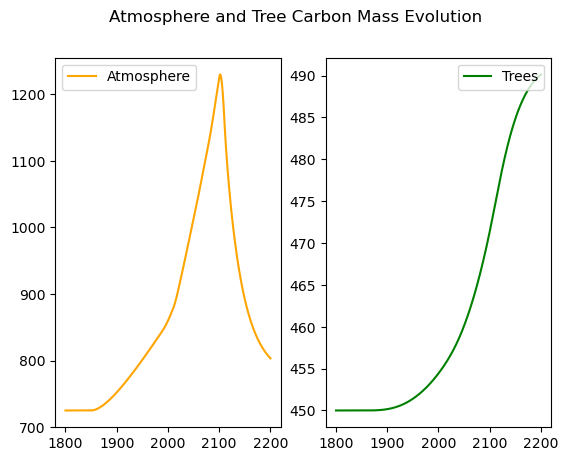

In [13]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(time_experimenting_nine, atm_arr_experimenting_nine, 'orange')
axes[1].plot(time_experimenting_nine, longbiota_arr_experimenting_nine, 'green')
axes[0].legend(['Atmosphere']), axes[1].legend(['Trees'], loc="upper right"), fig.suptitle('Atmosphere and Tree Carbon Mass Evolution')

plt.show()

- WILDFIRES and OCEAN CURRENTS (wind)
- go thru fulner paper and find topics we think matter... make a list of matters... for Wednesday... then build talk
- - additional reading outside... early earth climate... 

- plot 1st-order taylor of derivative (just for one box).. plot numerical vs analytical... add time-dependent forcing U see some challenges...

- configuration vs data files...
- pass T/F as param (forcing)

- numerical recipes add to esoteric wisdom

- an EXPERIMENT for FIRE model: lose 4% of forest per year for next 100 years
- - once we lose 20%... shift to grassland...
- - - forest canopy reduces albedo... absorbs more infrared... hangs on to temp => is wetter... in tropics, removing hardwoods exposes ground to more UV so ground dries up => albedo up -> loss of evap and humidity => grasslands!! 
- - what percent goes to ATM, what percent goes to PEAT
- FLUX v TIME ooorrr MASS v TIME plot to model fire stuff... implement phenomenon into code... i.e. LONG-LIVED BIOTA mass is decreasing over time

## SKETCH EXPERIMENT with respect to MODEL... and choose one of 6 experiments we've discussed

pick out KEY FIGURES and KEY FEATURES ... explain everything on figures with content

losing 4%... 